In [4]:
import os
import sys
import csv
import matplotlib.pyplot as plt
import seaborn as sns

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(repo_root)

from src import *

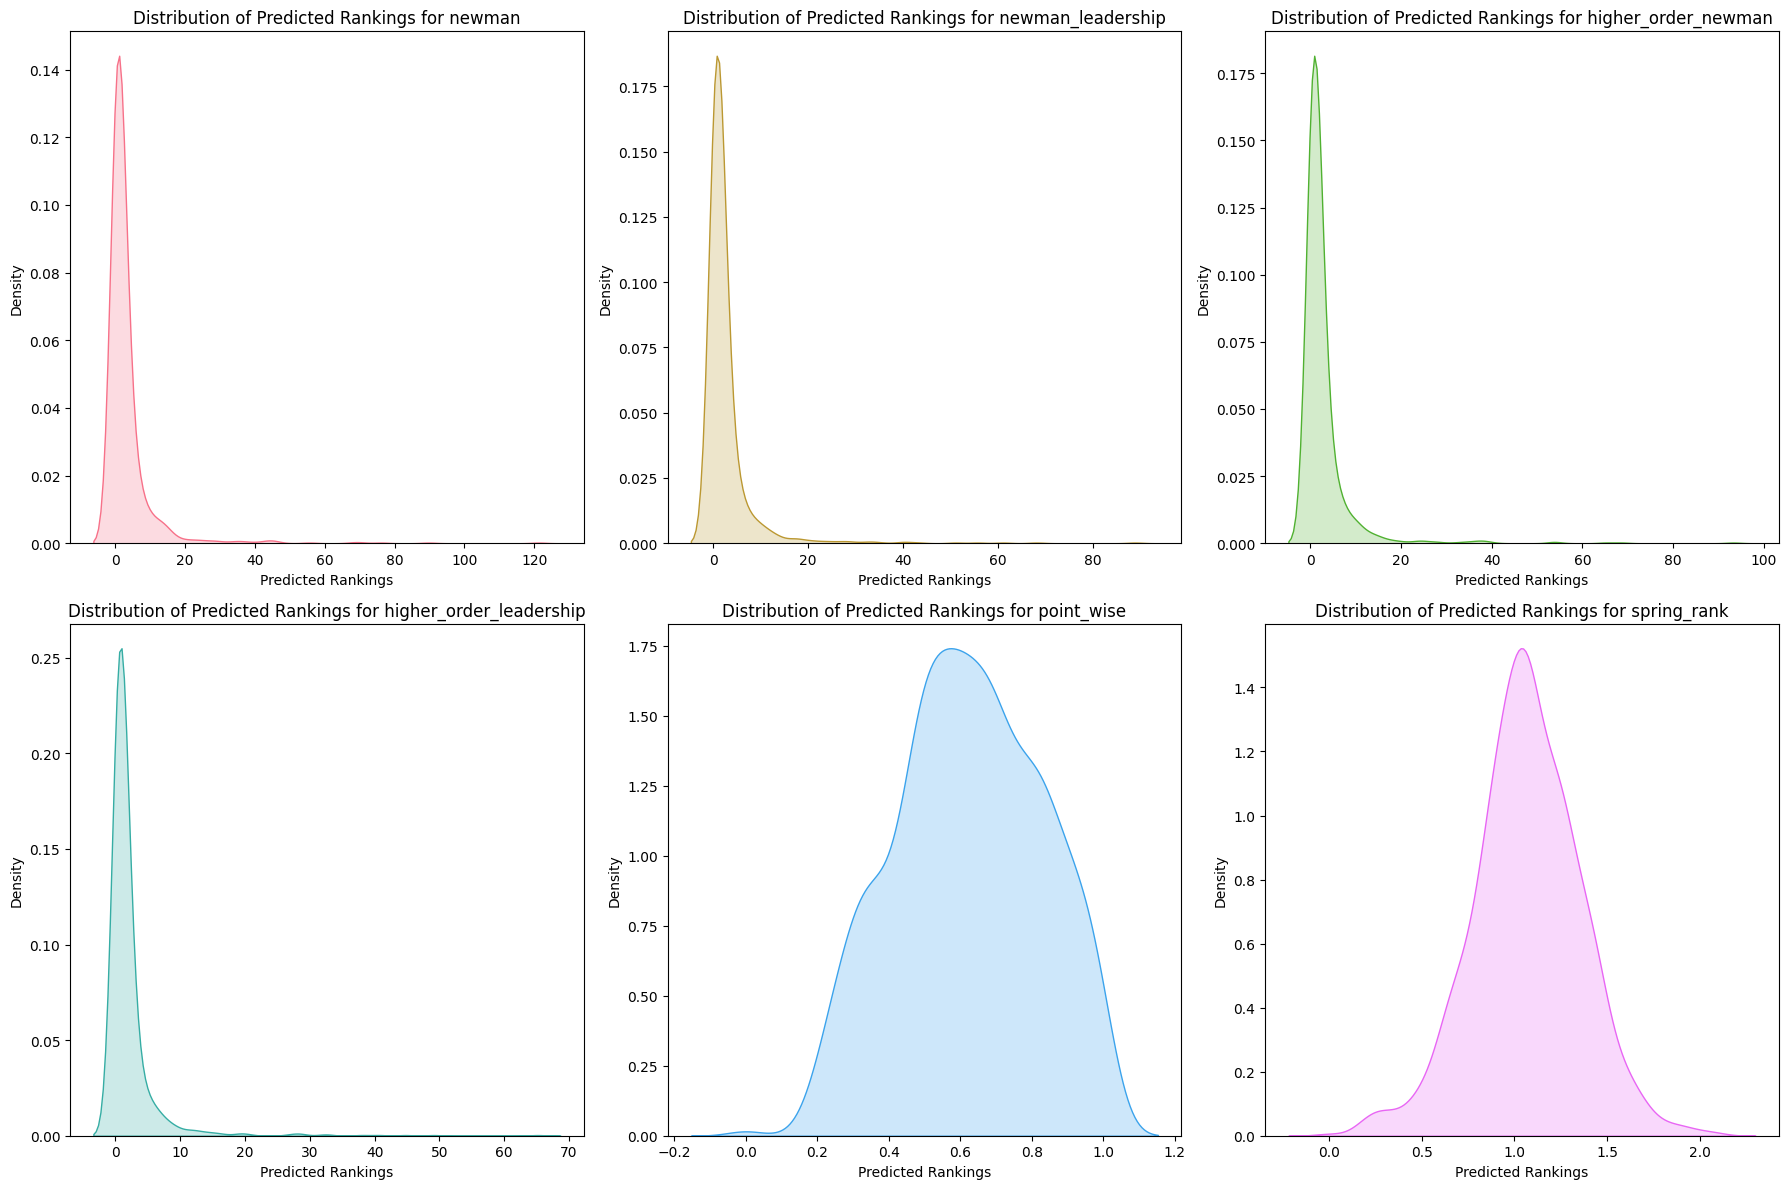

In [18]:
pi_values, data = generate_model_instance(1000, 1500, 2, 6)

predictions = {}

# Generate predictions for each model
for model in ['newman', 'newman_leadership', 'higher_order_newman', 'higher_order_leadership', 'point_wise', 'spring_rank']:
    predicted_rankings = list(get_predictions(model, data, pi_values).values())
    predictions[model] = predicted_rankings

num_models = len(predictions)
colors = sns.color_palette("husl", num_models)  # Generate a color palette with unique colors

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12), sharex=False)

# Plot each distribution independently
for i, (model, preds) in enumerate(predictions.items()):
    row = i // 3
    col = i % 3
    sns.kdeplot(preds, ax=axs[row, col], fill=True, color=colors[i])
    axs[row, col].set_title(f'Distribution of Predicted Rankings for {model}')
    axs[row, col].set_xlabel('Predicted Rankings')
    axs[row, col].set_ylabel('Density')

plt.tight_layout()
plt.show()




